In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

# **Dataset Auto_MPG**

In [282]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/DeepLearning/auto-mpg.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [283]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [284]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [285]:
dataset.replace('?',np.nan,inplace=True)
dataset.isnull().sum().sort_values()

cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
car name        0
mpg             0
horsepower      6
dtype: int64

In [286]:
for i in dataset.columns:
    if dataset[i].isnull().sum() > 0:
        dataset[i].fillna(dataset[i].astype(float).mean(), inplace=True)

dataset[["horsepower"]] = dataset[["horsepower"]].astype("int")


In [287]:
dataset.isnull().sum().sort_values()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
mpg             0
dtype: int64

In [288]:
dataset['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

In [289]:
dataset.drop(['car name'],axis=1,inplace=True)

In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    int64  
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbbdf80128>,
      dtype=object)

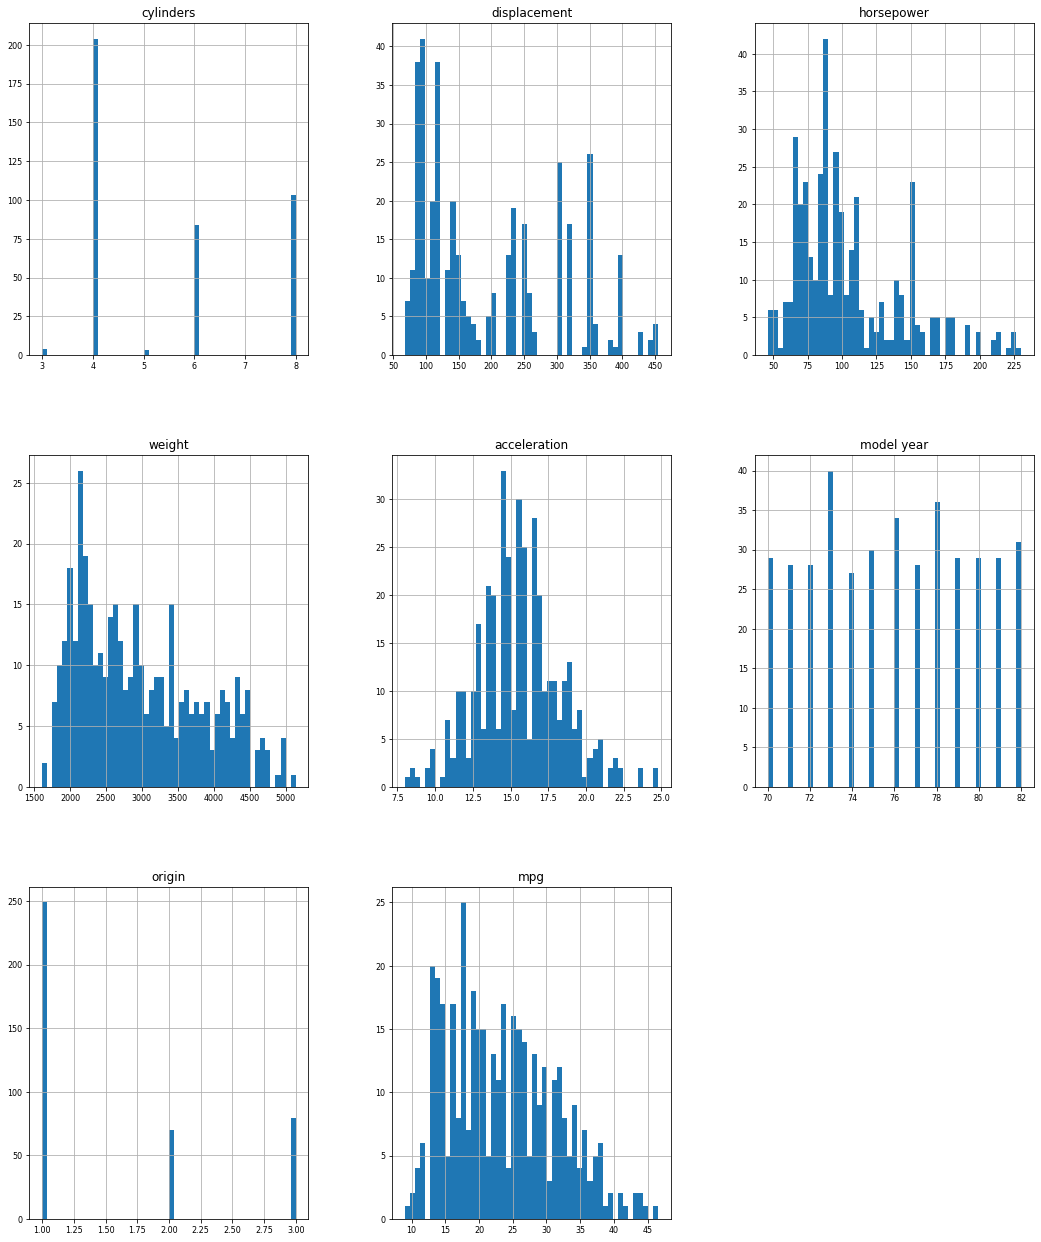

In [291]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

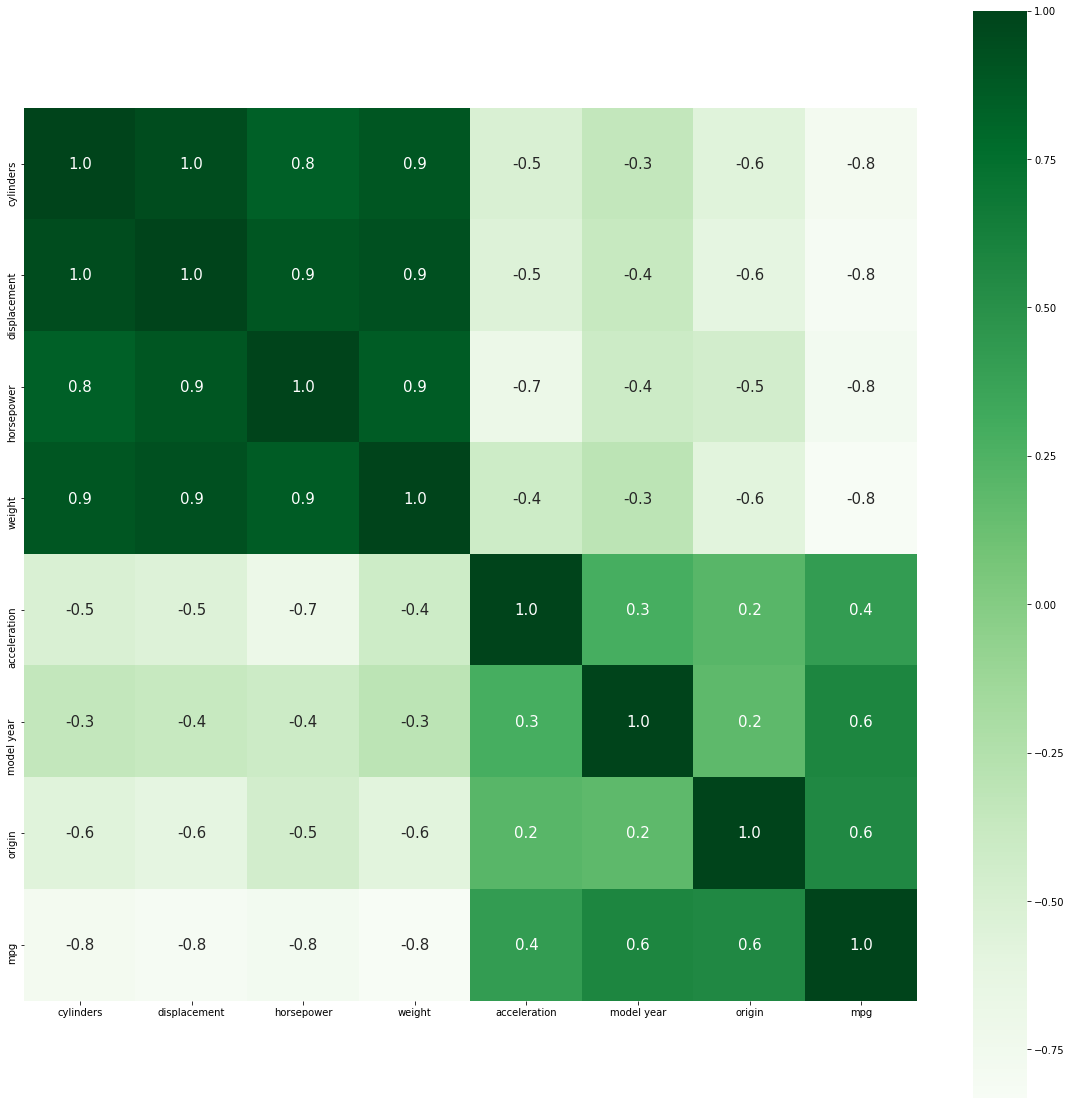

In [292]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# **Linear Regression**

## **Feature Engineering**

In [293]:
label = dataset['mpg']
features = dataset.drop(['mpg'], axis=1)

scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [294]:
linear_reg = LinearRegression()
linear_reg.fit(feature_train, label_train)

predictions = linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.20826660169611802
MAE (Mean Absolute Error) 0.3684271684436153
r^2 score 0.792478802889181
RMSE (Root Mean Squared Error 0.4563623578869296


## **Base Model DL**

In [337]:
model = Sequential()
model.add(Dense(7,input_dim=7, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [338]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.9671 - val_loss: 0.9335
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.8522 - val_loss: 0.7688
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6309 - val_loss: 0.5088
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3972 - val_loss: 0.3332
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2799 - val_loss: 0.2736
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2348 - val_loss: 0.2564
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2180 - val_loss: 0.2457
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2044 - val_loss: 0.2340
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1933 - val_loss: 0.2253
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1837 - val_loss: 0.2170
Epoch 11/50
40/40 [

In [339]:
predictions = model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15771143900367993
MAE (Mean Absolute Error) 0.30847694243624807
r^2 score 0.8428530241835525
RMSE (Root Mean Squared Error 0.39712899542048036


## **Deeper Model DL**

In [340]:
deeper_model = Sequential()
deeper_model.add(Dense(7,input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 1s 19ms/step - loss: 0.9940 - val_loss: 0.9946
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.9602 - val_loss: 0.9308
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.8499 - val_loss: 0.7646
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6466 - val_loss: 0.5412
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4490 - val_loss: 0.3881
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3343 - val_loss: 0.3179
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2719 - val_loss: 0.2820
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2446 - val_loss: 0.2680
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2273 - val_loss: 0.2571
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2148 - val_loss: 0.2447
Epoch 11/50
40/40 

In [341]:
predictions = deeper_model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1576851553540551
MAE (Mean Absolute Error) 0.3070258370985159
r^2 score 0.842879213761671
RMSE (Root Mean Squared Error 0.39709590196079225


## **Wider Model DL**

In [342]:
wider_model = Sequential()
wider_model.add(Dense(20,input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8721 - val_loss: 0.7654
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5862 - val_loss: 0.4404
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3141 - val_loss: 0.2822
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2335 - val_loss: 0.2528
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2079 - val_loss: 0.2327
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1888 - val_loss: 0.2137
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1733 - val_loss: 0.2004
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1592 - val_loss: 0.1902
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1478 - val_loss: 0.1827
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1764
Epoch 11/

In [343]:
predictions = wider_model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.14851992723902346
MAE (Mean Absolute Error) 0.2919318463297486
r^2 score 0.8520116387147619
RMSE (Root Mean Squared Error 0.3853828320501881


In [344]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [345]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.872061,0.765351,0
1,0.586248,0.440375,1
2,0.314134,0.282195,2
3,0.233519,0.252825,3
4,0.207878,0.232710,4
...,...,...,...
95,0.095252,0.146405,95
96,0.094707,0.154047,96
97,0.093074,0.148913,97
98,0.093423,0.150290,98


In [346]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
89,0.094586,0.144865,89
76,0.098287,0.145587,76
95,0.095252,0.146405,95
80,0.096699,0.146677,80
84,0.094827,0.146909,84
...,...,...,...
4,0.207878,0.232710,4
3,0.233519,0.252825,3
2,0.314134,0.282195,2
1,0.586248,0.440375,1


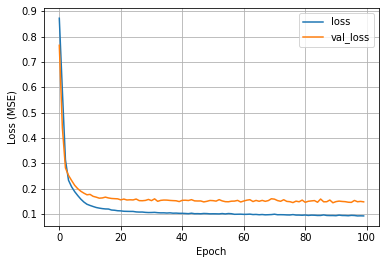

In [347]:
plot_loss(history) # epoch vs loss graph

### **Optimizer SGD**

In [348]:
wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20,input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 20)                160       
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [349]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9430 - val_loss: 0.8600
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7297 - val_loss: 0.5737
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4391 - val_loss: 0.3365
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2775 - val_loss: 0.2754
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2311 - val_loss: 0.2519
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2083 - val_loss: 0.2296
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.2147
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1754 - val_loss: 0.2038
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1647 - val_loss: 0.1969
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1876
Epoch 11/

In [350]:
predictions = wider_model_tuned.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15093339263924638
MAE (Mean Absolute Error) 0.29637474855415136
r^2 score 0.8496068113206386
RMSE (Root Mean Squared Error 0.3885014705753974


In [351]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
93,0.103142,0.148815,93
90,0.102626,0.150622,90
99,0.101392,0.150933,99
95,0.102147,0.150969,95
97,0.102019,0.151527,97
...,...,...,...
4,0.231142,0.251853,4
3,0.277507,0.275440,3
2,0.439147,0.336478,2
1,0.729658,0.573728,1


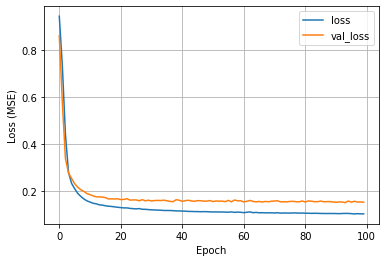

In [352]:
plot_loss(history_tuned) # epoch vs loss graph

### **Optimizer RMSprop**

In [353]:
wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 20)                160       
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [354]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8429 - val_loss: 0.6935
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5259 - val_loss: 0.3928
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2911 - val_loss: 0.2655
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2225 - val_loss: 0.2406
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1983 - val_loss: 0.2209
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1785 - val_loss: 0.2067
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1639 - val_loss: 0.1968
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1533 - val_loss: 0.1887
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1457 - val_loss: 0.1803
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1394 - val_loss: 0.1759
Epoch 11/

In [355]:
predictions = wider_model_rmsprop.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15187030606009527
MAE (Mean Absolute Error) 0.2987786783283517
r^2 score 0.8486732511957779
RMSE (Root Mean Squared Error 0.3897054093287586


In [356]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
70,0.094279,0.143615,70
88,0.092661,0.144836,88
83,0.095247,0.145147,83
58,0.098786,0.145181,58
75,0.095760,0.145842,75
...,...,...,...
4,0.198276,0.220871,4
3,0.222536,0.240643,3
2,0.291090,0.265540,2
1,0.525870,0.392765,1


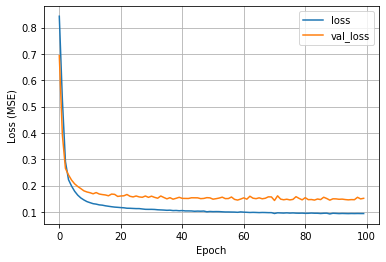

In [357]:
plot_loss(history_rmsprop) # epoch vs loss graph

# **Kesimpulan**


```
linear regression r^2 score 0.792478802889181
Base Model DL r^2 score 0.8428530241835525
Deeper Model DL r^2 score 0.842879213761671
Wider Model DL r^2 score 0.8520116387147619
opt SGD r^2 score 0.8496068113206386
opt RMSProp r^2 score 0.8486732511957779
```

Menurut hasil sekali run diatas Hasil yang di dapat untuk r^2 terbaik ada pada wider model dengan optimizer Adam 